# 第四次个人作业（时间序列分析 + 图像数据分析 + 文本数据分析，满分15分）

### 第一部分：时间序列分析（本部分满分5分）

请使用2010-2014年北京市天气和空气污染数据（air_polution.csv），完成以下各题。

1.1 请按照每周（每周第一天为周一，最后一天为周日）对空气污染指数（即pollution_today列）做聚合，聚合的方式为平均值，并将结果进行可视化。（聚合2分，可视化1分）

In [3]:
import pandas as pd

df = pd.read_csv("./air_pollution.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1825 non-null   object 
 1   pollution_today      1825 non-null   float64
 2   dew                  1825 non-null   float64
 3   temp                 1825 non-null   float64
 4   press                1825 non-null   float64
 5   wnd_spd              1825 non-null   float64
 6   snow                 1825 non-null   float64
 7   rain                 1825 non-null   float64
 8   pollution_yesterday  1825 non-null   float64
dtypes: float64(8), object(1)
memory usage: 128.4+ KB
None


,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [4]:
# 聚合
# Create sub_df for easier handling
sub_df = pd.DataFrame(df["pollution_today"].values,
                   index=pd.to_datetime(df["date"]),
                   columns=["pollution"])
# Take Sunday, i.e. last day of the week
agg = sub_df.resample("W-SUN").mean()
agg["rolling_mean"] = agg.pollution.rolling(9).mean()
agg.head(10)

,pollution,rolling_mean
date,,
2010-01-03,112.395833,NaN
2010-01-10,74.452381,NaN
2010-01-17,86.708333,NaN
2010-01-24,115.377451,NaN
2010-01-31,64.824930,NaN
2010-02-07,75.744048,NaN
2010-02-14,85.032738,NaN
2010-02-21,98.250000,NaN
2010-02-28,134.029762,94.090608


In [5]:
import numpy as np
import plotly.graph_objs as go

# 之前一位同学展示的package

fig = go.Figure()


fig.add_trace(go.Scatter(x=agg.index, y=agg.pollution,
               mode='lines',  name = '1-Week MA'))

fig.add_trace(go.Scatter(x=agg.index, y=agg.rolling_mean,
               mode='lines',  name = '9-Week MA'))

fig.update_layout(title='Pollution Moving Averages',)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)


fig.show()

1.2 请对风速（wnd_spd）和当天污染程度（pollution_today）两列做【简单】的相关性分析，并进行简单的可视化。做可视化时，请不要超过两个图表。（1分）

In [6]:
# 相关性
df["pollution_today"].corr(df["wnd_spd"])

-0.2846624965556284

- 负的；风会把污染吹走🍃

In [7]:
cols = {"pollution": df["pollution_today"].values, "wind": df["wnd_spd"].values}

sub_df = pd.DataFrame(cols, index=pd.to_datetime(df["date"]))
sub_df.head(5)

,pollution,wind
date,,
2010-01-02,145.958333,24.860000
2010-01-03,78.833333,70.937917
2010-01-04,31.333333,111.160833
2010-01-05,42.458333,56.920000
2010-01-06,56.416667,18.511667


In [8]:
import plotly.express as px

fig = px.scatter_3d(sub_df, x=sub_df.index, y=sub_df.pollution, z=sub_df.wind,
                    color=(sub_df.wind - sub_df.pollution)
                    )

fig.update_layout(title="Correlation of Wind vs Pollution", 
                  scene = dict(
                  xaxis_title='Time',
                  yaxis_title='Pollution',
                  zaxis_title='Wind Speed'))

- 从旁边看上面的图就可以看到wind speed和pollution的负相关性
- 相关性随着时间的推移保持不变

1.3 除了空气污染情况外，本数据集还给出了湿度（dew）、温度（temp）、气压（press）、风速（wnd_spd）、降雪量（snow）、降雨量（rain）等时间序列数据。你认为如何能够使用此数据更好地预测空气污染情况？（1分，不超过300字）

我认为这些数据可以用来建立一个机器学习模型，并预测污染。最有用的数据部分点应该是过去的污染(pollution_yesterday)。我会尝试LSTMs、RNNs和Transformer模型，因为它是时间序列数据。

也可能值得尝试获得更好的数据，如工厂和汽车信息（堵车等）。

### 第二部分：图像数据分析（本部分满分5分）

2.1 利用fetch_openml读取"mnist_784"数据集，计算并展示数据集中的每个类别（0-9）的平均形态。（1.5分）

In [9]:
from sklearn import datasets
import pandas as pd

mnist = datasets.fetch_openml("mnist_784")

In [10]:
print(mnist.keys(), mnist["data"].shape, mnist["target"].shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url']) (70000, 784) (70000,)


In [11]:
mnist_df = pd.DataFrame(mnist["data"])
mnist_df = mnist_df.applymap(lambda x: x/255.) # 标准化
mnist_df["label"] = pd.DataFrame(mnist["target"]).astype(int)

In [12]:
sub_df = mnist_df.groupby("label").mean()

In [13]:
# 平均形态
sub_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.000121,0.000121,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000021,0.000132,0.000098,0.000287,0.000281,0.000341,0.000401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001182,0.001011,0.000666,0.000462,0.000314,0.000169,0.000025,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000046,0.000076,0.000037,0.000000,0.000076,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000742,0.000763,0.000601,0.000253,0.000057,0.000000,0.000029,0.000064,0.000002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001590,0.001263,0.000844,0.000488,0.000399,0.000324,0.000120,0.000003,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000071,0.000168,0.000244,0.000210,0.000059,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000066,0.000145,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000031,0.000318,0.000822,0.001434,0.002200,0.004361,0.006356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

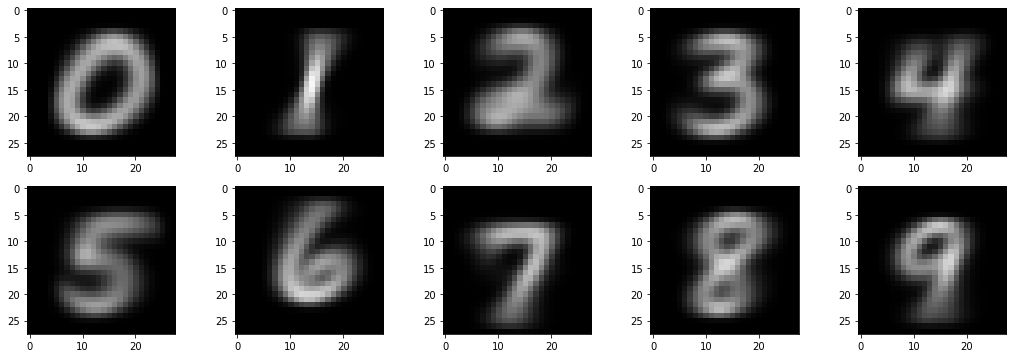

In [14]:
# 可视化
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(18, 6),facecolor='w', edgecolor='k',ncols=5, nrows=2)
for (i, row), ax in zip(sub_df.iterrows(), axes.flatten()):
    ax.imshow(row.values.reshape(28, 28), cmap='gray', vmin=0, vmax=1, interpolation='none') # vmax要用1，因为/255

2.2 利用sklearn中的MLPClassifier构建神经网络，对"mnist_784"数据集进行分类，要求： 
- 按照7:2:1的比例，依据类别分层抽样，将数据划分为训练集（train）、验证集（validation）和测试集（test）。（1分）
- 构建单隐层神经网络（隐藏层参数自设）。（1分）
- 在训练集上训练模型。（0.5分）
- 在验证集上选出最优模型。（0.5分）
- 并在测试集上得到预测结果，并进行模型结果评价。（0.5分）


In [15]:
### Sklearn ###

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(mnist_df.drop("label", axis=1).values, mnist_df.label, test_size=0.1, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

# 训练集上训练模型 和 验证集上选出最优模型 (early stopping)
model = MLPClassifier(hidden_layer_sizes=(10,), early_stopping=True, validation_fraction=2/9)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2222222222222222, verbose=False,
              warm_start=False)

In [16]:
model.score(X_test, y_test)

0.9232857142857143

##### 比较节点数 ; 不用early_stpping

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist_df.drop("label", axis=1).values, mnist_df.label, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

acc_vl_list, acc_tr_list = [], []
nodes_list = [10,20,50,100,200,500,1000]

for nodes_num in nodes_list:
    model = MLPClassifier(alpha=0.1, max_iter=200, hidden_layer_sizes=(nodes_num,))
    model.fit(X_train, y_train)
    acc_vl_list.append(model.score(X_val, y_val)) # Validation accuracy
    acc_tr_list.append(model.score(X_train, y_train)) # Training accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



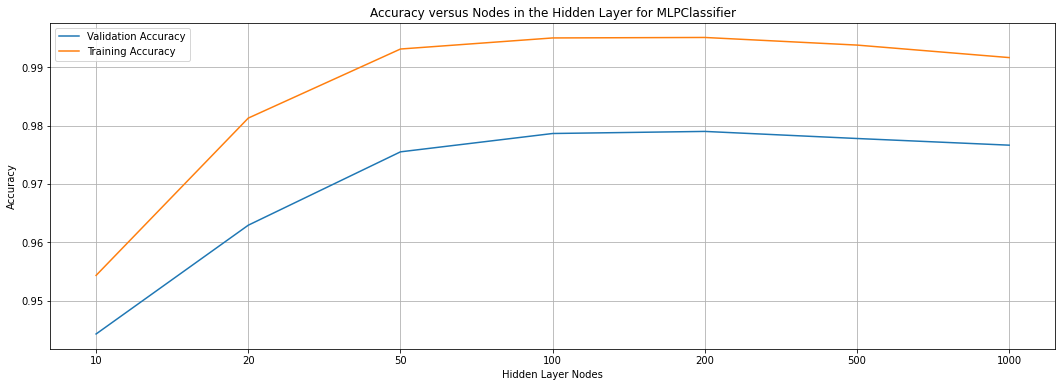

In [18]:
import numpy as np


N = len(nodes_list)
xticks = np.arange(N)
fig, axes = plt.subplots(figsize=(18, 6),facecolor='w', edgecolor='k')

plt.plot(xticks, acc_vl_list, label="Validation Accuracy")
plt.plot(xticks, acc_tr_list, label="Training Accuracy")

plt.xticks(xticks, nodes_list)
plt.grid(True)

plt.xlabel("Hidden Layer Nodes")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
plt.show()

In [19]:
# 最佳的

idx = -2

print("最佳的 - 节点数: {} 验证集正确率: {}".format(nodes_list[idx], acc_vl_list[idx]))

model = MLPClassifier(alpha=0.1, max_iter=200, hidden_layer_sizes=(nodes_list[idx],))
model.fit(X_train, y_train)

print("测试集预测结果: ", model.score(X_test, y_test))

最佳的 - 节点数: 500 验证集正确率: 0.9777857142857143
测试集预测结果:  0.9788571428571429


In [20]:
mnist_df[:int(0.7*len(mnist_df))]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
48996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
48997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
48998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [21]:
### PyTorch ###

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader 

class MNISTDataset(Dataset):
    """MNIST Dataset Wrapper"""
    def __init__(self, df):   
        self.labels = df[["label"]].values
        self.imgs = df.drop("label", axis=1).values.reshape((len(df), 28, 28, 1))
                  
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label, image = self.labels[idx], self.imgs[idx]
        return torch.as_tensor(image, dtype=torch.float), torch.as_tensor(label, dtype=torch.long)

train_dataset = MNISTDataset(mnist_df[:int(0.7*len(mnist_df))])
val_dataset = MNISTDataset(mnist_df[int(0.7*len(mnist_df)):int(0.9*len(mnist_df))])
test_dataset = MNISTDataset(mnist_df[int(0.9*len(mnist_df)):])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

class SimpleCNN(nn.Module):
    """
    Simple CNN (could add BatchNorm to improve)
    """
    def __init__(self, dropout_proba=0.1):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(4, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 64, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool_pad = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        
        self.fc1 = nn.Linear(4*4*64, 256)
        self.fc2 = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(p=dropout_proba)
        
    def forward(self, x):
        x = x.reshape((x.shape[0], x.shape[-1], x.shape[1], x.shape[2])) # > BSx1x28x28 
        
        x = self.pool(F.relu(self.conv1(x))) # > 4x14x14 
        x = self.pool(F.relu(self.conv2(x))) # > 16x7x7
        x = self.pool_pad(F.relu(self.conv3(x)))  # > 64x4x4
        
        # Reshape & FCs
        x = x.view(-1, 4*4*64)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleCNN()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

val_loss_min = np.Inf
epochs = 25
out_path = "./"

for epoch in range(1, epochs+1):
    # Keep track of train & val loss & accuracy
    train_loss, val_loss = 0.0, 0.0
    train_correct, val_correct = [], []
    
    ###################
    # Train the model #
    ###################
    # Activate Dropout & Co
    model.train()
    for data, target in train_dataloader:
        # Move tensors to correct device (GPU if Cuda available)
        data, target = data.to(device), target.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss & squeeze target to get correct shape
        loss = criterion(output, target.squeeze())
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step
        optimizer.step()
        # Update correct & training loss
        _, pred = torch.max(output, 1)
        train_correct.extend((target.squeeze() == pred).detach().tolist())
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # Validate the model #
    ######################
    # Deactivate Dropout & Co
    model.eval()
    for data, target in val_dataloader:
        # Deactivate autograd
        with torch.no_grad():
            # Move tensors to correct device (GPU if Cuda available)
            data, target = data.to(device), target.to(device)
            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # Calculate the batch loss
            loss = criterion(output, target.squeeze())
            # Update correct & validation loss 
            _, pred = torch.max(output, 1)
            val_correct.extend((target.squeeze() == pred).tolist())
            val_loss += loss.item()*data.size(0)
                
    # Calculate average losses
    train_loss = train_loss/len(train_dataloader.dataset)
    val_loss = val_loss/len(val_dataloader.dataset)
    
    # Calculate accuracy
    train_acc = sum(train_correct) / len(train_correct)
    val_acc = sum(val_correct) / len(val_correct)
        
    # Print training/validation statistics 
    print('Epoch: {} \tTrain Loss: {:.6f} \tTrain Accuracy: {:.6f} \tVal Loss: {:.6f} \tVal Accuracy: {:.6f}'.format(
        epoch, train_loss, train_acc, val_loss, val_acc))
    
    # Save model if validation loss has decreased, i.e. early stopping
    if val_loss <= val_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
              val_loss_min,
              val_loss))
        torch.save(model.state_dict(), os.path.join(out_path, 'model.pt'))
        val_loss_min = val_loss

Epoch: 1 	Train Loss: 1.108551 	Train Accuracy: 0.680857 	Val Loss: 0.399670 	Val Accuracy: 0.885357
Validation loss decreased (inf --> 0.399670).  Saving model ...
Epoch: 2 	Train Loss: 0.331371 	Train Accuracy: 0.901490 	Val Loss: 0.224054 	Val Accuracy: 0.930857
Validation loss decreased (0.399670 --> 0.224054).  Saving model ...
Epoch: 3 	Train Loss: 0.214681 	Train Accuracy: 0.934796 	Val Loss: 0.162592 	Val Accuracy: 0.952286
Validation loss decreased (0.224054 --> 0.162592).  Saving model ...
Epoch: 4 	Train Loss: 0.162154 	Train Accuracy: 0.950000 	Val Loss: 0.127631 	Val Accuracy: 0.961643
Validation loss decreased (0.162592 --> 0.127631).  Saving model ...
Epoch: 5 	Train Loss: 0.133592 	Train Accuracy: 0.959122 	Val Loss: 0.109012 	Val Accuracy: 0.966214
Validation loss decreased (0.127631 --> 0.109012).  Saving model ...
Epoch: 6 	Train Loss: 0.115631 	Train Accuracy: 0.963612 	Val Loss: 0.096844 	Val Accuracy: 0.970071
Validation loss decreased (0.109012 --> 0.096844).  Sa

In [22]:
model.load_state_dict(torch.load(os.path.join(out_path, 'model.pt')))
model.eval()
test_correct = []

# Iterate over test data
with torch.no_grad():
    for data, target in test_dataloader:
        # Move tensors to correct device (GPU if Cuda available)
        data, target = data.to(device), target.to(device)
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # Add to preds
        test_correct.extend((target.squeeze() == pred).cpu().tolist())

print("Test Accuracy: ", sum(test_correct) / len(test_correct))

Test Accuracy:  0.9891428571428571


#### MLP

- 节点数太多，模型就会过拟合 (variance比较高）
- 节点太少，模型就不能学习 (bias比较高)
- 通过比例，发现~500节点最合适 (如果加一个隐层，应该更少)

#### 为什么PyTorch的CNN比MLP好多?

全连接层(MLP)有两个问题。它们需要大量的参数，因
为每个节点都要与每个后续节点相乘。它们对输入的顺序也是不变的。
这对图像数据来说是个问题，因为像素的位置很重要。卷积层(CNN)解决了
这两个问题。kernel 的权值是重复使用的，因此需要更少的参数。如
果 kernel 小于图像的维度，每个 kernel 也只看图像的一部分。这使得
模型能够理解位置。

### 第三部分：文本数据分析（本部分满分5分）

3.1 什么是自动文摘（也称为自动摘要）？自动文摘一般可以分成哪两类？（1分）

它是自动总结文本的。有两种类型:

- 抽取式摘要: 它从文本中提取最重要的部分作为摘要。它重复使用文本中的句子。
- 生成式摘要: 它使用新词来总结文本。

In [23]:
example_text = """
In a time not far from our own, Lawrence sets out simply to build an
artifical intelligence that can pass as human, and finds himself instead with
one that can pass as a god. Taking the Three Laws of Robotics literally,
Prime Intellect makes every human immortal and provides instantly for
every stated human desire. Caroline finds no meaning in this life of
purposeless ease, and forgets her emptiness only in moments of violent and
profane exhibitionism. At turns shocking and humorous, Prime Intellect
looks unflinchingly at extremes of human behavior that might emerge when
all limits are removed.
"""
num_sentences = 1


# 抽取式摘要
!pip install -q transformers[sentencepiece] # 下载之后需要restart
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

weights = "sshleifer/distill-pegasus-cnn-16-4"

tokenizer = AutoTokenizer.from_pretrained(weights)
model = AutoModelForSeq2SeqLM.from_pretrained(weights)

input_ids = tokenizer.encode(example_text, max_length=1024, return_tensors='pt')
summary = model.generate(input_ids, min_length=20*num_sentences, max_length=20+20*num_sentences)
out1 = tokenizer.decode(summary[0], skip_special_tokens=True, clean_up_tokenization_spaces=True).strip()




# 生成式摘要
weights = "sshleifer/distilbart-cnn-6-6"

tokenizer = AutoTokenizer.from_pretrained(weights)
model = AutoModelForSeq2SeqLM.from_pretrained(weights)

input_ids = tokenizer.encode(example_text, max_length=1024, return_tensors='pt')
summary = model.generate(input_ids, min_length=20*num_sentences, max_length=20+20*num_sentences)
out2 = tokenizer.decode(summary[0], skip_special_tokens=True, clean_up_tokenization_spaces=True).strip()


print("-"*50)
print("输入:\n", example_text)
print("\n抽取式摘要\n")
print(".".join(out1.split(".")[:num_sentences]) + ".")
print("\n" + "-"*10)
print("\n生成式摘要\n\n")
print(".".join(out2.split(".")[:num_sentences]) + ".")

     |████████████████████████████████| 2.3MB 9.3MB/s 
     |████████████████████████████████| 3.3MB 38.9MB/s 
     |████████████████████████████████| 901kB 36.9MB/s 
     |████████████████████████████████| 1.1MB 23.8MB/s 


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/transformers/models/bart/configuration_bart.py:178: UserWarning:

Please make sure the config includes `forced_bos_token_id=0` in future versions.The config can simply be saved and uploaded again to be fixed.



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


--------------------------------------------------
输入:
 
In a time not far from our own, Lawrence sets out simply to build an
artifical intelligence that can pass as human, and finds himself instead with
one that can pass as a god. Taking the Three Laws of Robotics literally,
Prime Intellect makes every human immortal and provides instantly for
every stated human desire. Caroline finds no meaning in this life of
purposeless ease, and forgets her emptiness only in moments of violent and
profane exhibitionism. At turns shocking and humorous, Prime Intellect
looks unflinchingly at extremes of human behavior that might emerge when
all limits are removed.


抽取式摘要

Prime Intellect looks unflinchingly at extremes of human behavior that might emerge when all limits are removed.

----------

生成式摘要


Lawrence sets out to build an intelligence that can pass as human, and finds himself instead with a god.


3.2 收集近五年（2017-2021）政府工作报告全文，绘制词云，并分析政府工作重点的保持与变化，要求：
- 合理设置停用词，提升词云的可读性与区分度（2分）
- 结合外部统计数据或分析报告，对每年的重点和变化进行分析解释（不超过400字，言之成理即可，2分）

In [24]:
### 网络爬虫
import urllib.request
from bs4 import BeautifulSoup


urls = [
        "http://www.gov.cn/guowuyuan/2017-03/16/content_5177940.htm",
        "http://www.gov.cn/zhuanti/2018lh/2018zfgzbg/zfgzbg.htm",
        "http://www.gov.cn/zhuanti/2019qglh/2019lhzfgzbg/index.htm",
        "http://www.gov.cn/zhuanti/2020lhzfgzbg/index.htm",
        "http://www.gov.cn/zhuanti/2021lhzfgzbg/index.htm"
]

start_words = [
               "各位代表",
               "各位代表",
               "各位代表",
               "各位代表",
               "各位代表"
]

end_words = [
             "不懈奋斗",
             "新的贡献",
             "不懈奋斗",
             "不懈奋斗",
             "不懈奋斗"
]

years = [
         "2017",
         "2018",
         "2019",
         "2020",
         "2021"
]


gov_work = {}

for u, s, e, y in zip(urls, start_words, end_words, years):

    html = urllib.request.urlopen(u).read()

    # Decode to unicode, cuz of CN Chars
    decoded_html = html.decode('utf-8')

    start_idx = decoded_html.find(s)
    end_idx = decoded_html.find(e)

    soup = BeautifulSoup(decoded_html[start_idx:end_idx], 'html.parser')
    gov_work[y] = "".join(soup.find_all(text=True))

In [25]:
# 例子
print(gov_work["2017"][:1000])

各位代表：
现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出意见。

一、2016年工作回顾
过去一年，我国发展面临国内外诸多矛盾叠加、风险隐患交汇的严峻挑战。在以习近平同志为核心的党中央坚强领导下，全国各族人民迎难而上，砥砺前行，推动经济社会持续健康发展。党的十八届六中全会正式明确习近平总书记的核心地位，体现了党和人民的根本利益，对保证党和国家兴旺发达、长治久安，具有十分重大而深远的意义。各地区、各部门不断增强政治意识、大局意识、核心意识、看齐意识，推动全面建成小康社会取得新的重要进展，全面深化改革迈出重大步伐，全面依法治国深入实施，全面从严治党纵深推进，全年经济社会发展主要目标任务圆满完成，“十三五”实现了良好开局。
——经济运行缓中趋稳、稳中向好。国内生产总值达到74.4万亿元，增长6.7%，名列世界前茅，对全球经济增长的贡献率超过30%。居民消费价格上涨2%。工业企业利润由上年下降2.3%转为增长8.5%，单位国内生产总值能耗下降5%，经济发展的质量和效益明显提高。
——就业增长超出预期。全年城镇新增就业1314万人。高校毕业生就业创业人数再创新高。年末城镇登记失业率4.02%，为多年来最低。13亿多人口的发展中大国，就业比较充分，十分不易。
——改革开放深入推进。重要领域和关键环节改革取得突破性进展，供给侧结构性改革初见成效。对外开放推出新举措，“一带一路”建设进展快速，一批重大工程和国际产能合作项目落地。
——经济结构加快调整。消费在经济增长中发挥主要拉动作用。服务业增加值占国内生产总值比重上升到51.6%。高技术产业、装备制造业较快增长。农业稳中调优，粮食再获丰收。
——发展新动能不断增强。创新驱动发展战略深入实施。科技领域取得一批国际领先的重大成果。新兴产业蓬勃兴起，传统产业加快转型升级。大众创业、万众创新广泛开展，全年新登记企业增长24.5%，平均每天新增1.5万户，加上个体工商户等，各类市场主体每天新增4.5万户。新动能正在撑起发展新天地。
——基础设施支撑能力持续提升。新建高速铁路投产里程超过1900公里，新建改建高速公路6700多公里、农村公路29万公里。城市轨道交通、地下综合管廊建设加快。新开工重大水利工程21项。新增第四代移动通信用户3.4亿、光缆线路550多万公里。
——人民生活继续改善。全国居民人均可支配收入

In [26]:
# 使用本来package的stopwords
!git clone https://github.com/amueller/word_cloud.git
%cd word_cloud/examples

Cloning into 'word_cloud'...
remote: Enumerating objects: 6459, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 6459 (delta 8), reused 6 (delta 0), pack-reused 6441
Receiving objects: 100% (6459/6459), 116.93 MiB | 29.32 MiB/s, done.
Resolving deltas: 100% (3839/3839), done.
/content/word_cloud/examples


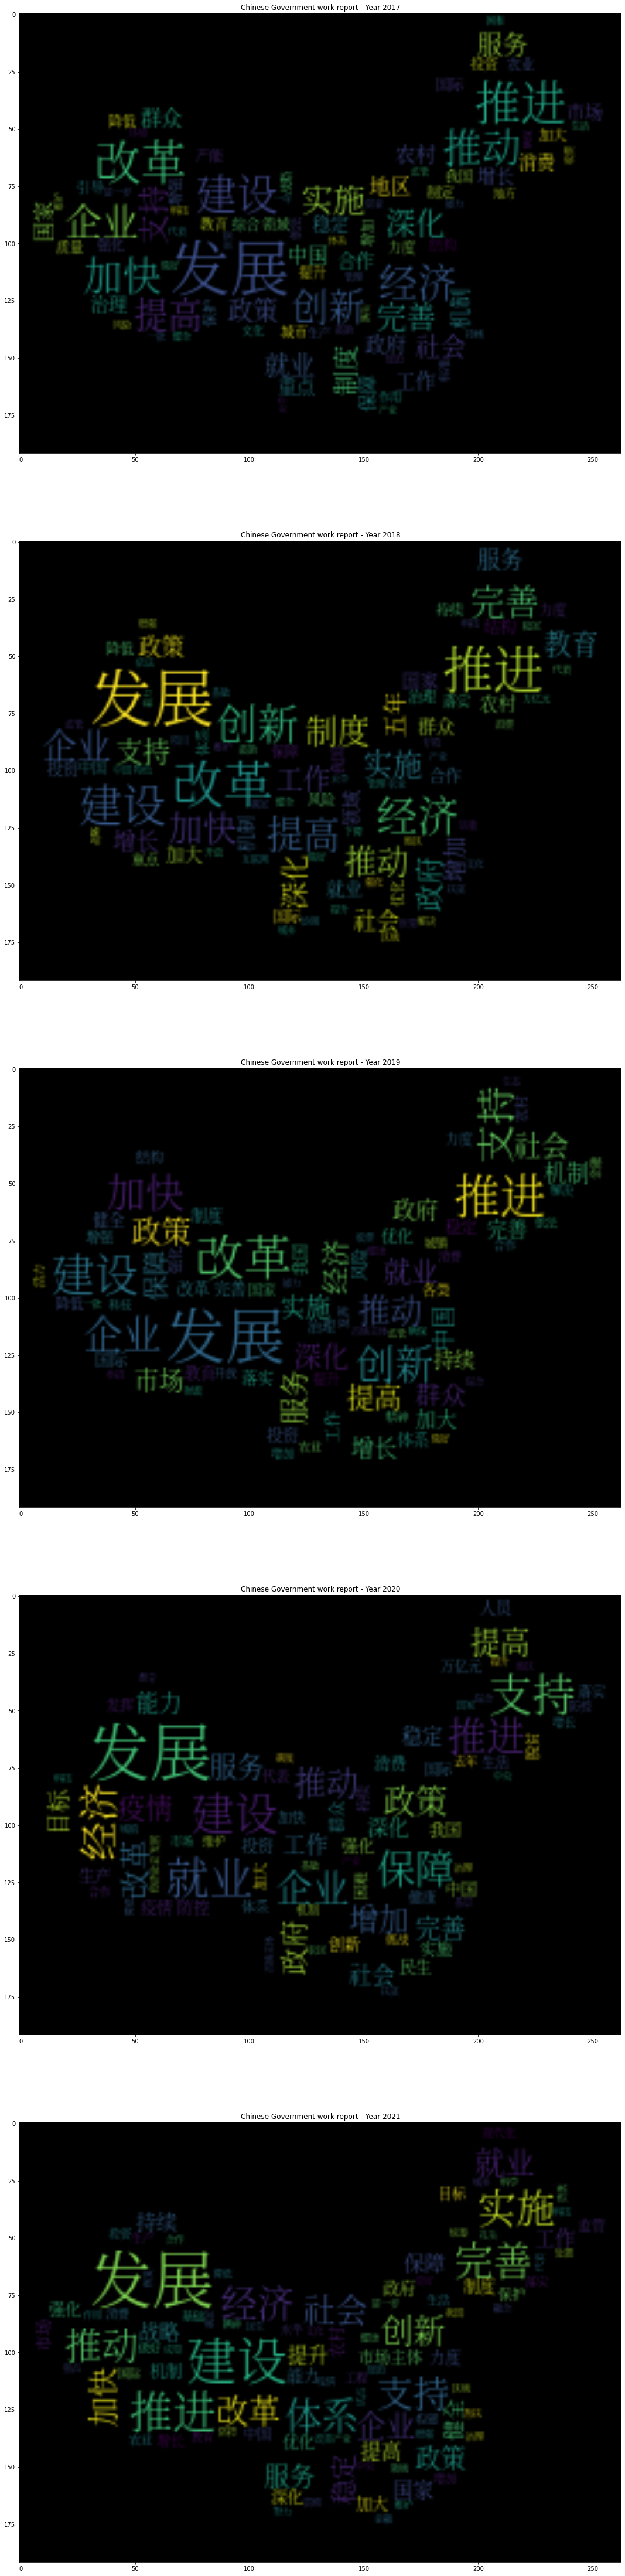

In [31]:
### 可视化

import jieba
from wordcloud import WordCloud

import os
from os import path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 让matplotlib用CN-font
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# Stopwords
stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
with open(stopwords_path, encoding='utf-8') as f:
    stopwords_text = f.read()
    stopwords_list = stopwords_text.splitlines()

# Jieba
def chinese_jieba(txt):
    wordlist_jieba = jieba.cut(txt)
    txt_jieba = " ".join(wordlist_jieba)
    return txt_jieba

# Background image
img_url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhIWFRUWFxgYGBYYFxcVGBcTGBUXGBYYGBcYHSggGBolGxUYITEhJSkrLi4uGB8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAMABBwMBIgACEQEDEQH/xAAaAAEAAwEBAQAAAAAAAAAAAAAAAgMFAQQH/8QAMRAAAgECBAQFAwQDAQEAAAAAAAERAiEDBDFBElFhcYGRobHwBcHREyLh8TJCUhUU/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/APuIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOVODOxMzW52vCS1n+jQxK1Sm3sY1eK221aQO/r1TPE/M9eDn3KVSUc+p5K6W3KUylt4P1IvDcfbeOYG4CjJ4k0LpbyLwAAAAAAAAAAAAAAAQpxE3CabAmAAAAAAAAAAAAAAAAAAAIY2Jw0t8vcz//AEKo0U8/4As+p1u1O2p4Dtdberk4Aknhazyv/HiQJ/692n4KUB6vpmJd087+Pz2NExMHE4Wmtj3Yf1BbqPUD2gIAAAAAAAAAAcbPBT9R50+uwF2dzLpiIvJn4WM6XK136lmbzHG1aEjzga+FmqatHfky8wTZy2LxUpgWgAAAAAAAAAAAAAAA8mfpqqimlTuzyUZKtzaI5/Y1ivFxqadX4bgY1dDThqGcPfnMWiqiVrMLmeACSp3fguf8DFqTdtLexPESa4pu9vfwKgAAA0Ppldmp3PTjZimnVmMANbLZnjbtEeYO5LDihc3f8AC8AADjZ0831Cn9jtpHuAzOKnRUlUp7+foZQAAAADXyccCh7eu5kADeBh0YjTlNmllc4qnDUP0YHqAAAAAAAAAAAjXWkpeiM7PqpVz5P3PPiY1VWrbA92ZzqiKXd76QZwAAngxMNTPuQO0VQ0wLFjXUWXKfPuR/TW1S9UGlFptz6/0QA7VQ1qcJ0VLR+d7PwO1Uf86deji/LbzArSLsLLt18Ltz7FuRTVcc0+vzQ0VQk293r4ASSAAAA42B08+dxIofW3mdzGaVK5vkZ2PmaqtdOQFIAAAAAAAB3Dqaaa1RxKScpaKet/QDTWcp56a6klm6P+kZOG738fE46XpFwNZZuj/r7F6ZgtFmHmKqdG+2qA2gZtP1B7pP0PPi49VWr8NgNj9Rc15lGYzdNKcOWZQAlXW25blkQTosm99F47+SYECTocT88ifEm/20687kaK7tveZ8f5AhBKmiei5ssb4UlrvF94a+fkqql3cvqBYqkk0nM9Leu+pHES1pmOvP57ECeHdNc7+QECeHS3+1T83PWvp/7VeKtz2YWEloknvAFOWyrpf+UrZHqAAAADxZvOcLdKV+Z5cbN1VKH/ZbnMrE1TvpHNnjAAAAAAAAAA7SpcHXC2b729F+QOtwl1WviyBP9V9uyQ/U539/MCBNVtwm4XzlqdlJWvfdXj5yOcSdojrf15gcxdfbe2mpEtiFe66PRx73OKttwoWysvOYAraBLEqnwLFpC5ac27z4AUhI7TTLgsor2Vqd+q6wBHgj/JPtoSoqUNQtOu15n7FdTly9yUwrbzf0j5zAlRS+Gyu91suRLMUW1lqz/koPdlOB8Te/PzhPcCvLZd1q9o337Htx6lRRpbRL8ltCSVojodqpkDIw8pW7x52NLL5dUrrzLgAAAAAAAABXj0TS0tzHxMN0uGoZuHnzOVVd5hgZILcxl3RE7kKaJ3jvzAiCfCt35fLDhX/S8nIEAkT4ktFfrD9IOPEfN+YESeLtzd/x4kliPhbd3a7u799iuqqQOAAAAAO01QTqc/uVnMWttZryfkVk9Ker9p19AJUVJ2hcT0fXqtDlCm9Ttbb08iFLuXJWbUuduTvr/AEcSqrXVPeF5Tt2I4e76e9vud4YTndL3RGjR9vuvwBEm7U93Pgrfd+RynDbU7dWl7knXCSTn2bfcDlNlLUvZfdkaqm9XJbj1aKLqzfi3CXiUgeyjOxQklf07k8tXitbNc6iGSysviqVuT3NFIAjoAAAAAAAAAAAAU5qhOlyphSZFVU9DaxcThU+fYx8apOptKE9gIAAAAAJ4ejXNfdMgCf6r3uuTAgCc09V6h0rVbap69wOYdMs5VT4osooiXVa0dZ7eJGY6rX5yAYaT112vBZi0qbym+drq1yP6i1Safey00K6qm7tyAqpj5JNKKX3Uc9/nicprUQ1MOdY5fg7VWm7qNrPbxArJ4L1XPTvt+PE7+lN00/R/LEq8RpJS5SV+kSBVU29ThNtO+nhb+BVh2lXXbTuBZhVRDbXirx0fiOObpK2qa+83IYjlcXZRFtHp5HMJ3jnaO4FmBmqqXrKm/3g10YmK1P7dDRyONNKW6t37AeoAAAAAAAAAAAABypTZmdmci1em/Tl+TSAGHVhNKWrMibtVKahngzGR1dPl/IHhAqUa2AAAAAmSw8N1aKT2L6c5X7rbgeKqpvVySb/AG9n7/0zuYwuGprU7RhzS+rVu2vhcCoBoACTw3yY4YiVbylFtWFV/ktHvp4MCLp2TstW7fEcxHaJl8+nfclTSlN+JaO11yfmcqr4W0rbTvqBUdpqjQksTmk+/wDGpJ8LUxEbL0uByqqab6qNLWvsVln6saJL19SSr4ndLpFr8gGJGtSu+U6c3J7cnhtRDtGj179DNqc3PX9Mpu3yA0gAAAAAAAAAAAAAAAAABXiYFNWqKf8A4aJm/abHqAFGFlaU24V/RHK8lQ9o7HoAEMLCVKhEwAONGbn6XS7OzTtG1rexpmX9QxU2ktp8wKX+5dUl4pW/HqRw1u9Ffv0OUVQ5OutXSUT4sC2VpU0731naVy2K8Sufmvodqqbp538v7+xCimfmwEsFubOPwMb/ACfefO51YL3/AG9/lzuJXS3KTb66eSv6gVE/9bbu/hou3zYYlF2kTWG4ai8rddZApRY3w6K/Pr2OYVr8vfb50IAXKhVOzu9ot10NTAwlSkl4nm+m4bSbas4g9oAAAAAAAAAAAAAAAAAAAAAAAAAAARrUproZOZyzoiXMmwVZmiaWkk3tIGMCXA5h2h36Hvp+nLdv2sB4sLEiVz33Wv5GLNuWukeMGng5WmlytepXnMsobVN/kgZgTOql8tCVNG7svfsBOvEcK99esJQpK6K4c6neB1XVL+WPbhfT7Li13j0A8X6u0LyPXl8nLmpW2R6KMlQrx6noAi2kuiXojw5Sp14jqey99D3YlMprmoKspgcC6vX7AXgAAAAAAAAAAAAAAAAAAAAAAAAAAAAI1UJymtSQAAAADzvBXHLSai3TwLMxPC+HU8OTyzdXFUvPdgaKR0AAAAAAAAAAAAAAAAAD/9k='

with urllib.request.urlopen(img_url) as url:
    with open('mask.jpg', 'wb') as f:
        f.write(url.read())
mask_img = mpimg.imread("mask.jpg")

# WordCloud
wc = WordCloud(font_path=font_path, background_color="black", max_words=2000,
              max_font_size=100, random_state=42, #width=1000, height=860, margin=2,
              stopwords=stopwords_list, mask=mask_img)



fig, axes = plt.subplots(figsize=(100, 80),facecolor='w', edgecolor='k', nrows=len(years))

cutted_texts = []

for ax, (k, v) in zip(axes.flatten(), gov_work.items()):
    # Create
    cutted_text = chinese_jieba(v)
    cutted_texts.append(cutted_text) ##
    wordcloud = wc.generate(cutted_text)

    # Save
    wordcloud.to_file("./cn_gov_wc_{}.jpg".format(k))

    # Show
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set(title="Chinese Government work report - Year {}".format(k))

plt.show()

思考：
- 有一些词每年都出现很多次，比如《发展》，《建设》
- 2020年，《就业》突然变得更大；2021年还是很大的 - 好像从2020年开始，失业率增加了 （看下面的图）；2020年《疫情》的次数和《保障》的增加应该跟病毒的出现有关系
- 2018年，《五年》的词也出现了，因为报告包括一个过去五年的回顾

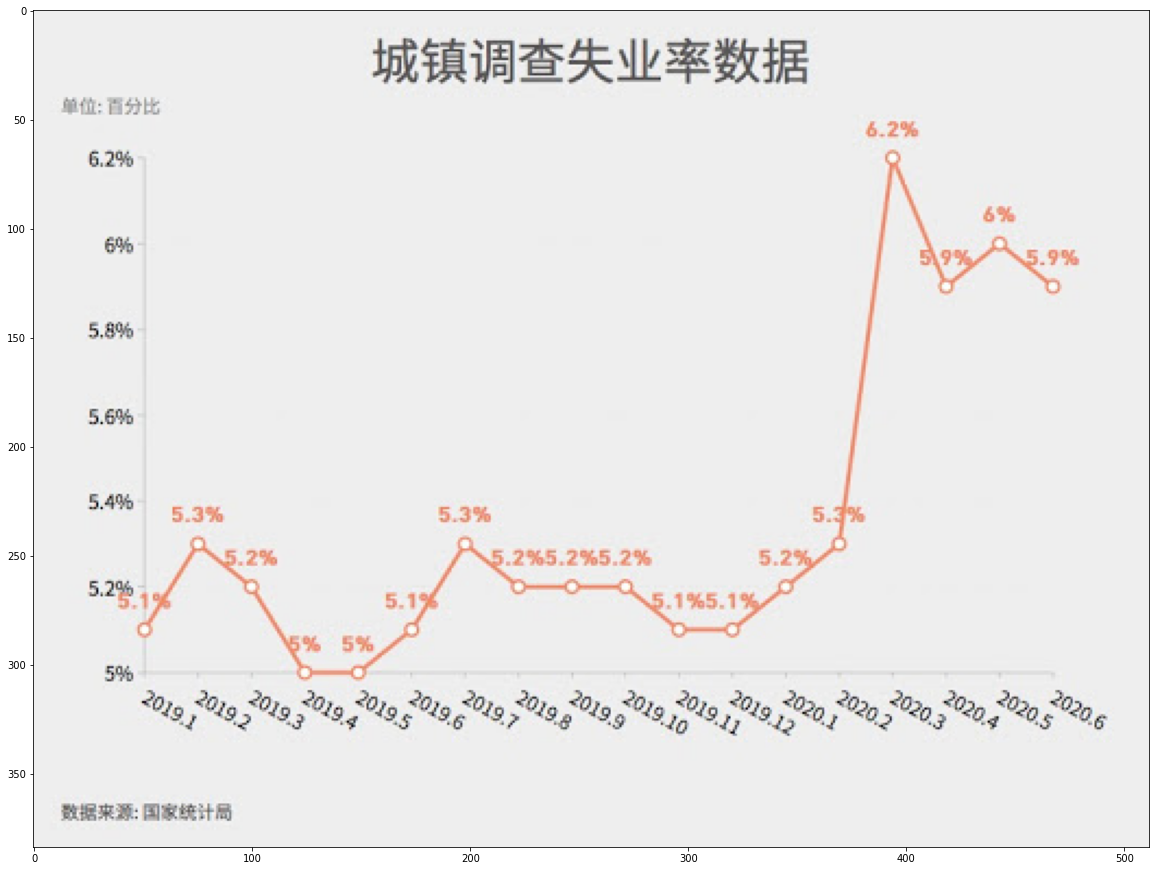

In [98]:
from skimage import io
import matplotlib.pyplot as plt

img_url = "https://lh3.googleusercontent.com/proxy/6InW7s0A_L7EWbwkd6Grn2JXGWpf8ZbVU3VH3yM52rA90iUTRpHIMfx8wY5gERSDjnwYANhfIFBSU1HbWocpg0yTtRLoBDail0gEDupXbEUPMmOjjx0mM4nzVCi7D6jTGyHDH0Q"

image = io.imread(img_url)
fig, axes = plt.subplots(figsize=(20, 16),facecolor='w', edgecolor='k')
plt.imshow(image)
plt.show()

##### 参考网站

- https://scikit-learn.org/
- https://matix.io/extract-text-from-webpage-using-beautifulsoup-and-python/
- https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html?highlight=save